#                          Adult Census Income Prediction Project

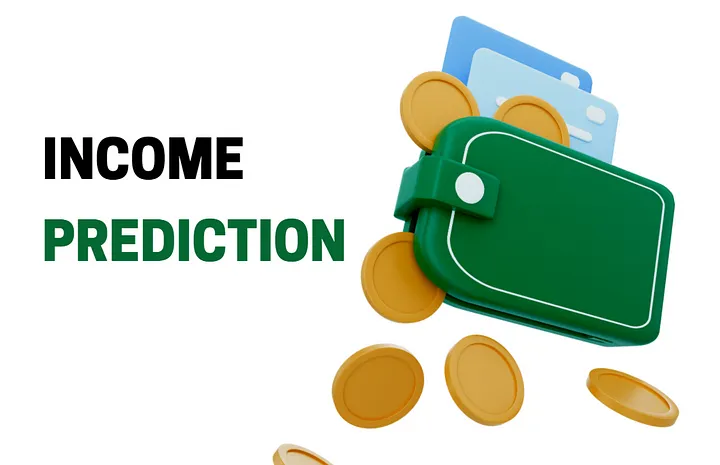

# *Problem Statement*
• The Goal is to predict whether a person has an income of more than 50K a year or not.
• This is basically a binary classification problem where a person is classified into the >50K group or <=50K group.

# Import Libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd 
import seaborn as sns
import missingno as mno
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import RandomOverSampler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [2]:
df = pd.read_csv("adult.csv", na_values="?", skipinitialspace = True)
df.head(5)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


# Exploratory Data Analysis (EDA) 

In [3]:
df.shape

(32561, 15)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       30725 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      30718 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  country         31978 non-null  object
 14  salary          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [5]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'country', 'salary'],
      dtype='object')

In [6]:
df.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
country           object
salary            object
dtype: object

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,32561.0,38.581647,13.640433,17.0,28.0,37.0,48.0,90.0
fnlwgt,32561.0,189778.366512,105549.977697,12285.0,117827.0,178356.0,237051.0,1484705.0
education-num,32561.0,10.080679,2.572720,1.0,9.0,10.0,12.0,16.0
capital-gain,32561.0,1077.648844,7385.292085,0.0,0.0,0.0,0.0,99999.0
capital-loss,32561.0,87.303830,402.960219,0.0,0.0,0.0,0.0,4356.0
hours-per-week,32561.0,40.437456,12.347429,1.0,40.0,40.0,45.0,99.0


In [8]:
df.isnull().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
country            583
salary               0
dtype: int64

In [9]:
round(df.isnull().sum() / df.shape[0] * 100, 2).astype(str) + "%"

age                0.0%
workclass         5.64%
fnlwgt             0.0%
education          0.0%
education-num      0.0%
marital-status     0.0%
occupation        5.66%
relationship       0.0%
race               0.0%
sex                0.0%
capital-gain       0.0%
capital-loss       0.0%
hours-per-week     0.0%
country           1.79%
salary             0.0%
dtype: object

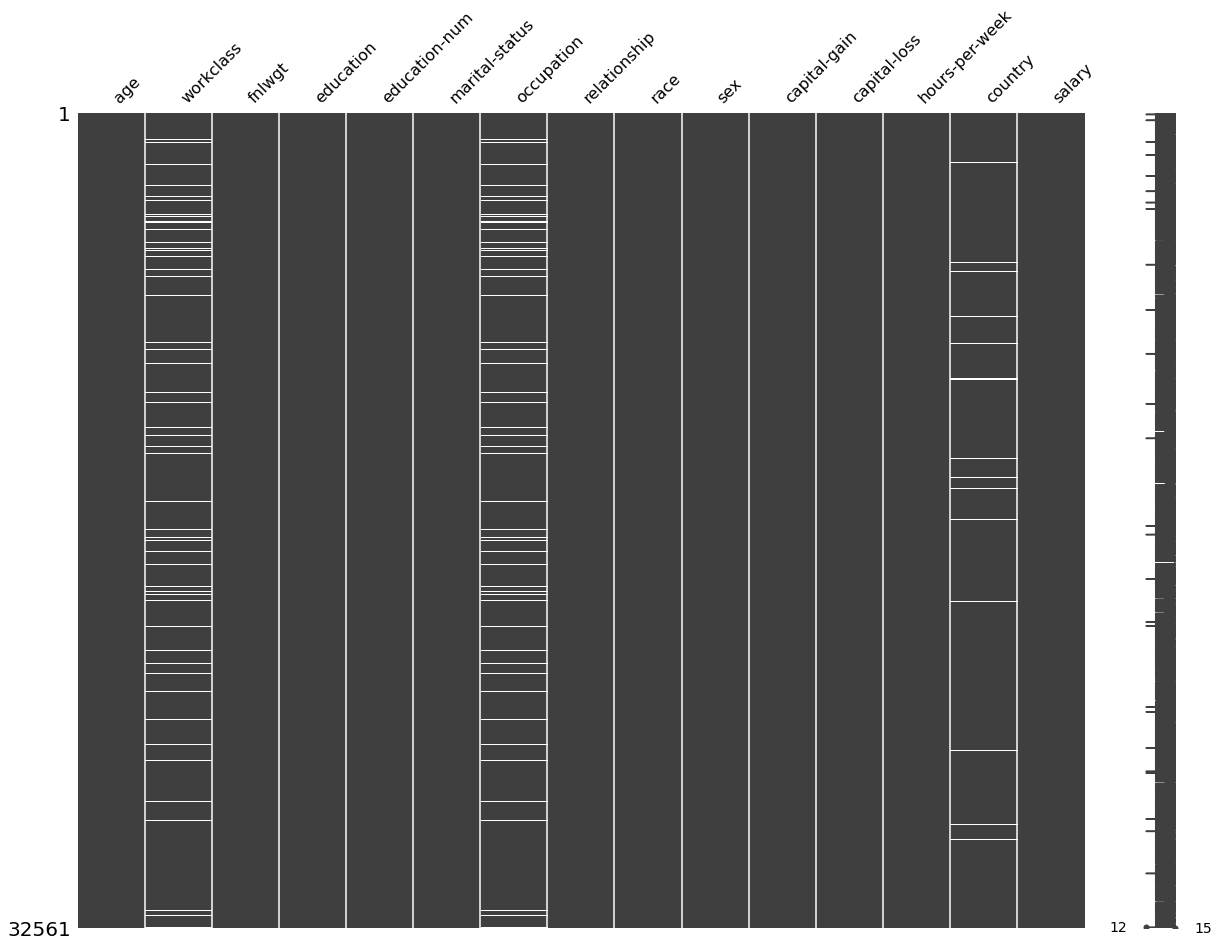

In [10]:
mno.matrix(df, figsize = (20,15))
plt.show()

In [11]:
nan_values_columns = ['workclass', 'occupation', 'country']

In [12]:
for col in nan_values_columns:
    df[col].fillna(df[col].mode()[0], inplace=True)

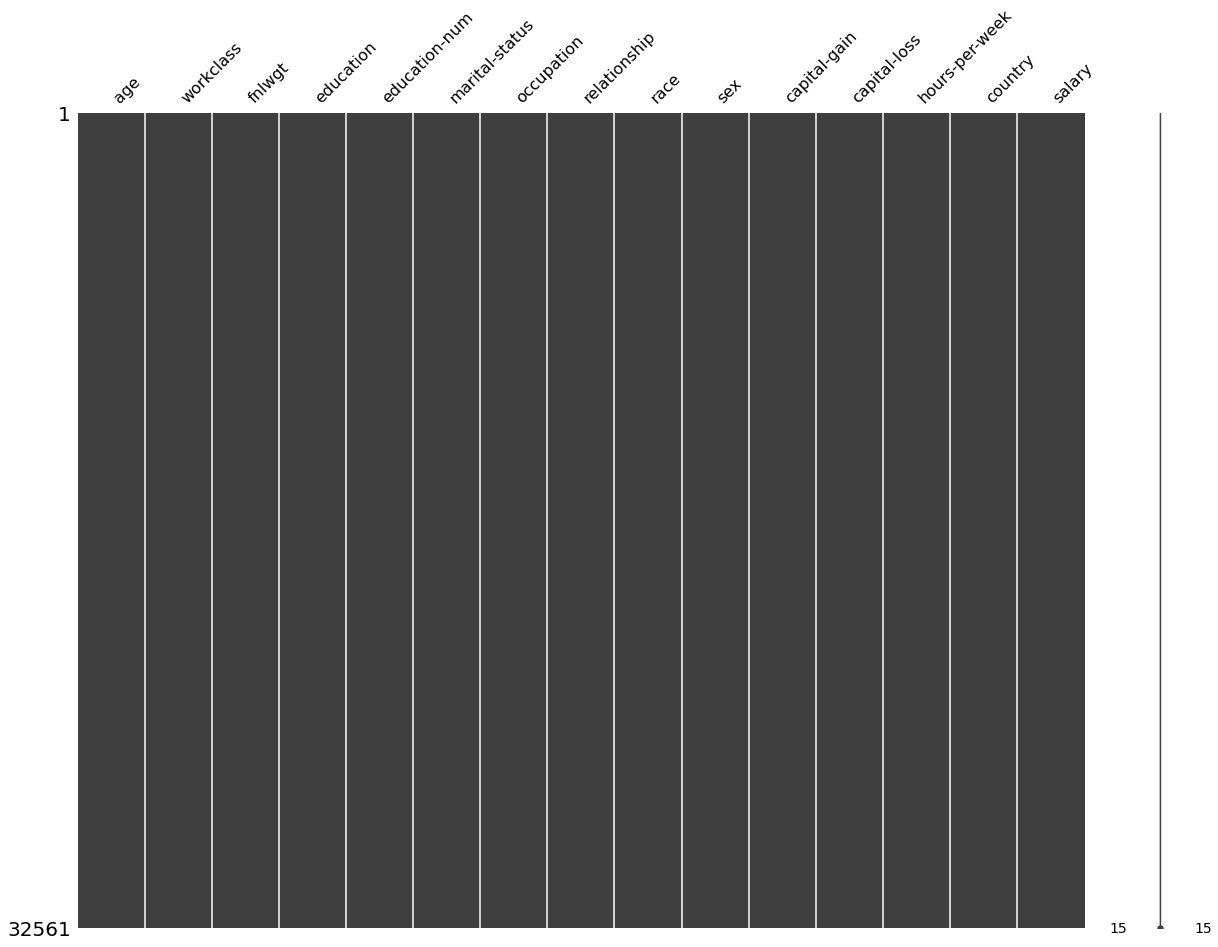

In [13]:
mno.matrix(df, figsize = (20,15))
plt.show()

In [14]:
df.nunique()

age                  73
workclass             8
fnlwgt            21648
education            16
education-num        16
marital-status        7
occupation           14
relationship          6
race                  5
sex                   2
capital-gain        119
capital-loss         92
hours-per-week       94
country              41
salary                2
dtype: int64

In [15]:
round(df.nunique() / df.shape[0] * 100, 2).astype(str) + "%"

age                0.22%
workclass          0.02%
fnlwgt            66.48%
education          0.05%
education-num      0.05%
marital-status     0.02%
occupation         0.04%
relationship       0.02%
race               0.02%
sex                0.01%
capital-gain       0.37%
capital-loss       0.28%
hours-per-week     0.29%
country            0.13%
salary             0.01%
dtype: object

In [16]:
df.duplicated().sum()

24

In [17]:
df = df.drop_duplicates()
df.head(5)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [18]:
df.shape

(32537, 15)

In [19]:
salary = df['salary'].value_counts(normalize=True)
round(salary * 100, 2).astype('str') + ' %'

<=50K    75.91 %
>50K     24.09 %
Name: salary, dtype: object

# Data Visualization

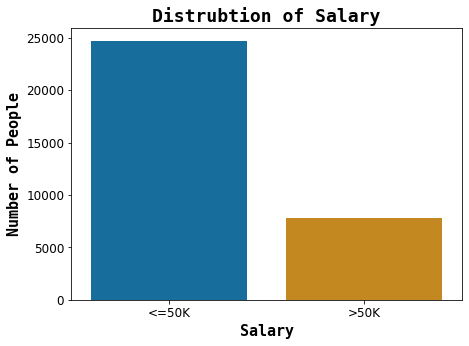

In [20]:
# barplot plot for 'Age'
salary= df['salary'].value_counts()

plt.figure(figsize=(7,5))
plt.tick_params(labelsize=12)
sns.barplot(salary.index, salary.values, palette='colorblind')
plt.title('Distrubtion of Salary', fontdict={
    'fontname':'Monospace', 'fontsize':18, 'fontweight':'bold'})
plt.xlabel('Salary', fontdict={
    'fontname':'Monospace', 'fontsize':15, 'fontweight':'bold'})
plt.ylabel('Number of People', fontdict={
    'fontname':'Monospace', 'fontsize':15, 'fontweight':'bold'})
plt.show()

<Figure size 1440x1080 with 0 Axes>

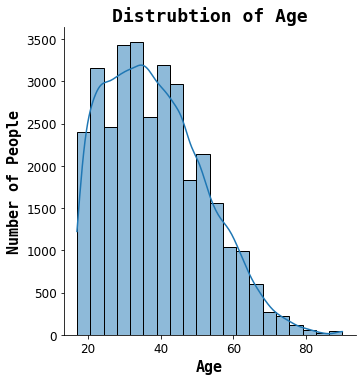

In [21]:
# distribution plot for 'Age'
age = df['age'].value_counts()

plt.figure(figsize=(20,15))
sns.displot(df['age'], bins=20, kde=True)
plt.title('Distrubtion of Age', fontdict={
    'fontname':'Monospace', 'fontsize':18, 'fontweight':'bold'})
plt.xlabel('Age', fontdict={
    'fontname':'Monospace', 'fontsize':15, 'fontweight':'bold'})
plt.ylabel('Number of People', fontdict={
    'fontname':'Monospace', 'fontsize':15, 'fontweight':'bold'})
plt.tick_params(labelsize=12)
plt.show()

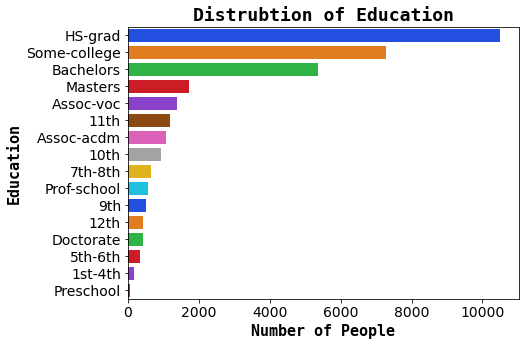

In [22]:
# Barplot for "Education"
education = df['education'].value_counts()

plt.figure(figsize=(7,5))
sns.barplot(education.values, education.index, palette='bright')
plt.title('Distrubtion of Education', fontdict={
    'fontname':'Monospace', 'fontsize':18, 'fontweight':'bold'})
plt.xlabel("Number of People", fontdict={
    'fontname':'Monospace', 'fontsize':15, 'fontweight':'bold'})
plt.ylabel("Education", fontdict={
    'fontname':'Monospace', 'fontsize':15, 'fontweight':'bold'})
plt.tick_params(labelsize=14)
plt.show()

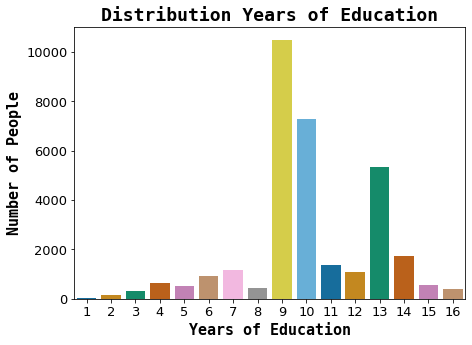

In [23]:
# Barplot for "Years of Education"

education_num = df['education-num'].value_counts()
plt.figure(figsize=(7,5))
sns.barplot(education_num.index, education_num.values, palette='colorblind')
plt.title('Distribution Years of Education', fontdict={
    'fontname': 'Monospace', 'fontsize': 18, 'fontweight': 'bold'})
plt.xlabel('Years of Education', fontdict={
    'fontname': 'Monospace', 'fontsize': 15, 'fontweight': 'bold'})
plt.ylabel('Number of People', fontdict={
    'fontname': 'Monospace', 'fontsize': 15, 'fontweight': 'bold'})
plt.tick_params(labelsize=13)
plt.show()

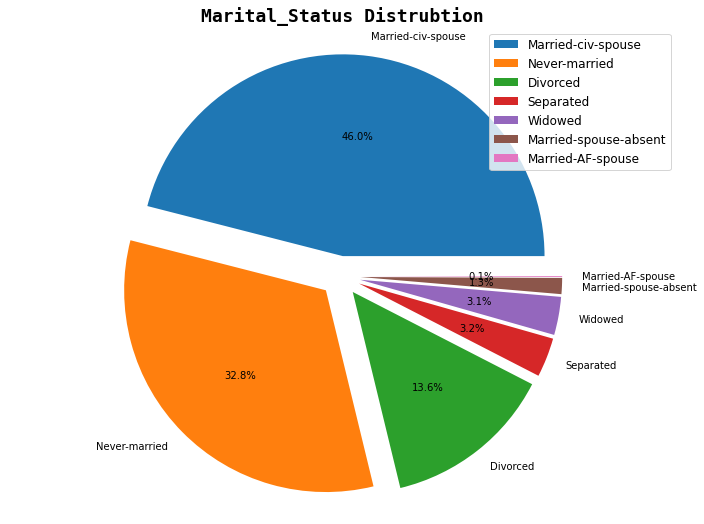

In [24]:
# Pie chart for "Marital Status"
marital = df['marital-status'].value_counts()

plt.figure(figsize=(12,9))
plt.pie(marital.values, labels=marital.index, 
        explode=(0.10,0.10,0.10,0.10,0.10,0.10,0.10), autopct='%1.1f%%')
plt.title("Marital_Status Distrubtion",fontdict={
    'fontname': 'Monospace', 'fontsize': 18, 'fontweight': 'bold'})
plt.legend()
plt.legend(prop={'size':12})
plt.axis('equal')
plt.show()

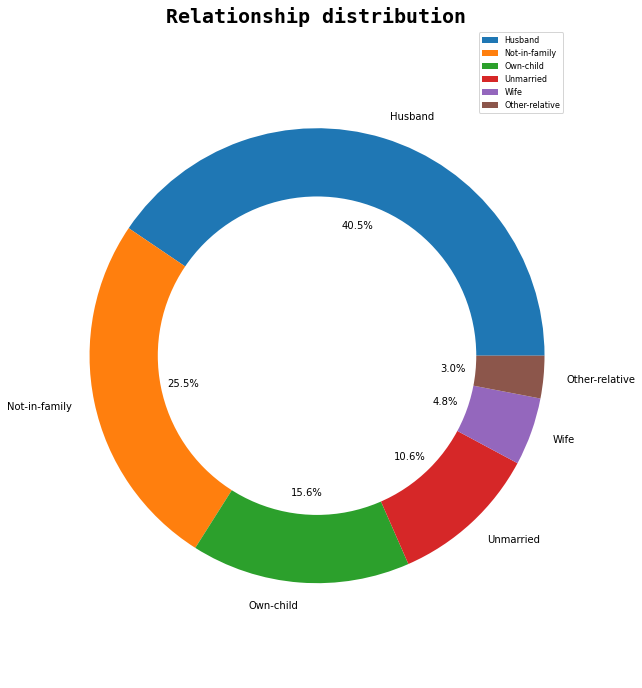

In [25]:
# Chart for 'Age'
relationship = df['relationship'].value_counts()

plt.figure(figsize=(9,12))
plt.pie(relationship.values, 
        labels=relationship.index, 
        autopct='%1.1f%%')
center_part_circle = plt.Circle((0,0), 0.7, fc='White')
plt.title('Relationship distribution', fontdict={
    'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
fig = plt.gcf()
fig.gca().add_artist(center_part_circle)
plt.axis('equal')
plt.legend(prop={'size':8})
plt.show()

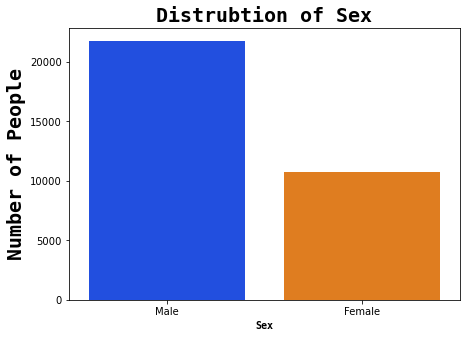

In [26]:
# borplot for 'Sex'

sex = df['sex'].value_counts()
plt.figure(figsize=(7,5))
sns.barplot(sex.index, sex.values, palette='bright')
plt.title('Distrubtion of Sex', fontdict={
    'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Sex', fontdict={
    'fontname': 'Monospace', 'fontsize': 10, 'fontweight': 'bold'})
plt.ylabel('Number of People',  fontdict={
    'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.tick_params(labelsize=10)
plt.show()

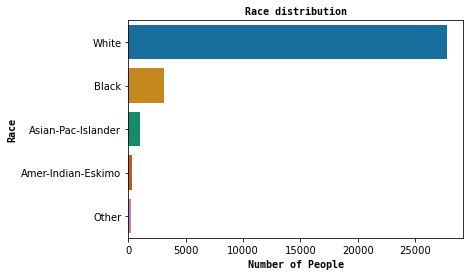

In [27]:
# barplot for 'Race'
race = df['race'].value_counts()

plt.figure(figsize=(6,4))
sns.barplot(race.values, race.index, palette='colorblind')
plt.title('Race distribution', fontdict={
    'fontname': 'Monospace', 'fontsize': 10, 'fontweight': 'bold'})
plt.xlabel("Number of People", fontdict={
    'fontname':'Monospace', 'fontsize':10, 'fontweight':'bold'})
plt.ylabel("Race", fontdict={
    'fontname':'Monospace', 'fontsize':10, 'fontweight':'bold'})
plt.tick_params(labelsize=10)
plt.show()

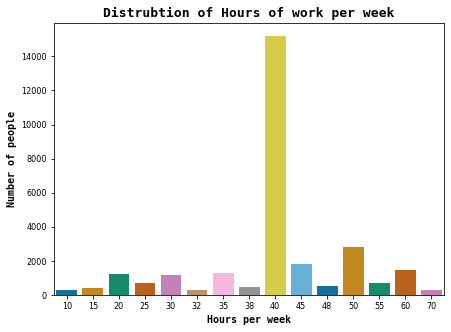

In [28]:
# barplot for 'Hours per week'
hour = df['hours-per-week'].value_counts().head(15)

plt.figure(figsize=(7,5))
sns.barplot(hour.index, hour.values, palette='colorblind')
plt.title('Distrubtion of Hours of work per week', fontdict={
    'fontname':'Monospace', 'fontsize':13, 'fontweight':'bold'})
plt.xlabel('Hours per week', fontdict={
    'fontname':'Monospace', 'fontsize':10, 'fontweight':'bold'})
plt.ylabel('Number of people', fontdict={
    'fontname':'Monospace', 'fontsize':10, 'fontweight':'bold'})
plt.tick_params(labelsize=8)
plt.show()

# Bivariate Analysis

Bivariate analysis is a statistical technique used to analyze the relationship between two variables. In coding, bivariate analysis can be performed using a variety of programming languages and statistical software packages. 

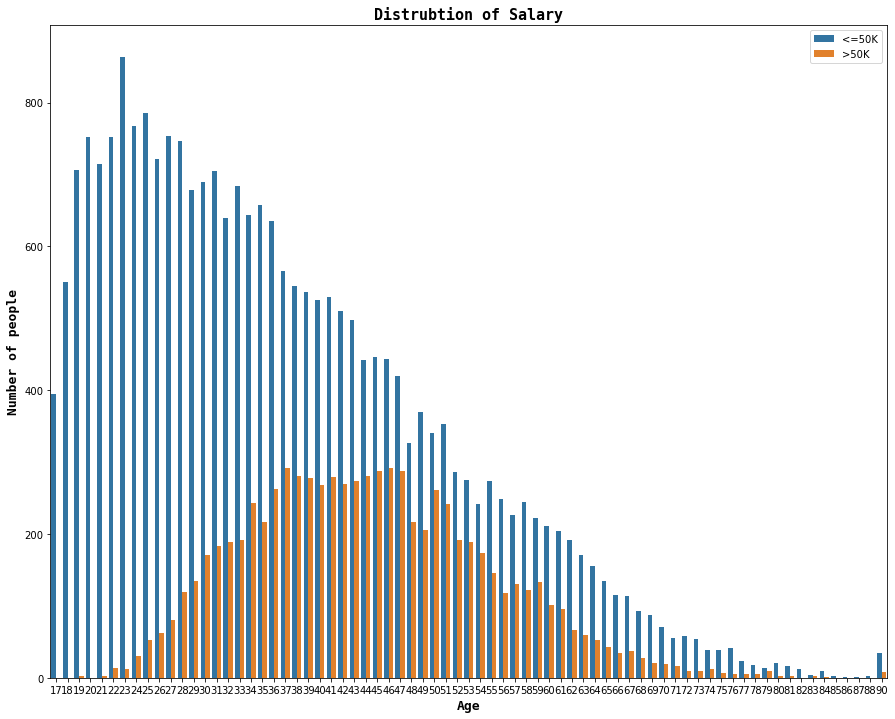

In [29]:
# Countplot of Salary with Age
plt.figure(figsize=(15,12))
sns.countplot(df['age'], hue=df['salary'])
plt.title('Distrubtion of Salary', fontdict={
    'fontname':'Monospace', 'fontsize':15, 'fontweight':'bold'})
plt.xlabel('Age', fontdict={
    'fontname':'Monospace', 'fontsize':13, 'fontweight':'bold'})
plt.ylabel('Number of people', fontdict={
    'fontname':'Monospace', 'fontsize':13, 'fontweight':'bold'})
plt.legend(loc=1, prop={'size':10})
plt.tick_params(labelsize=10)
plt.show()

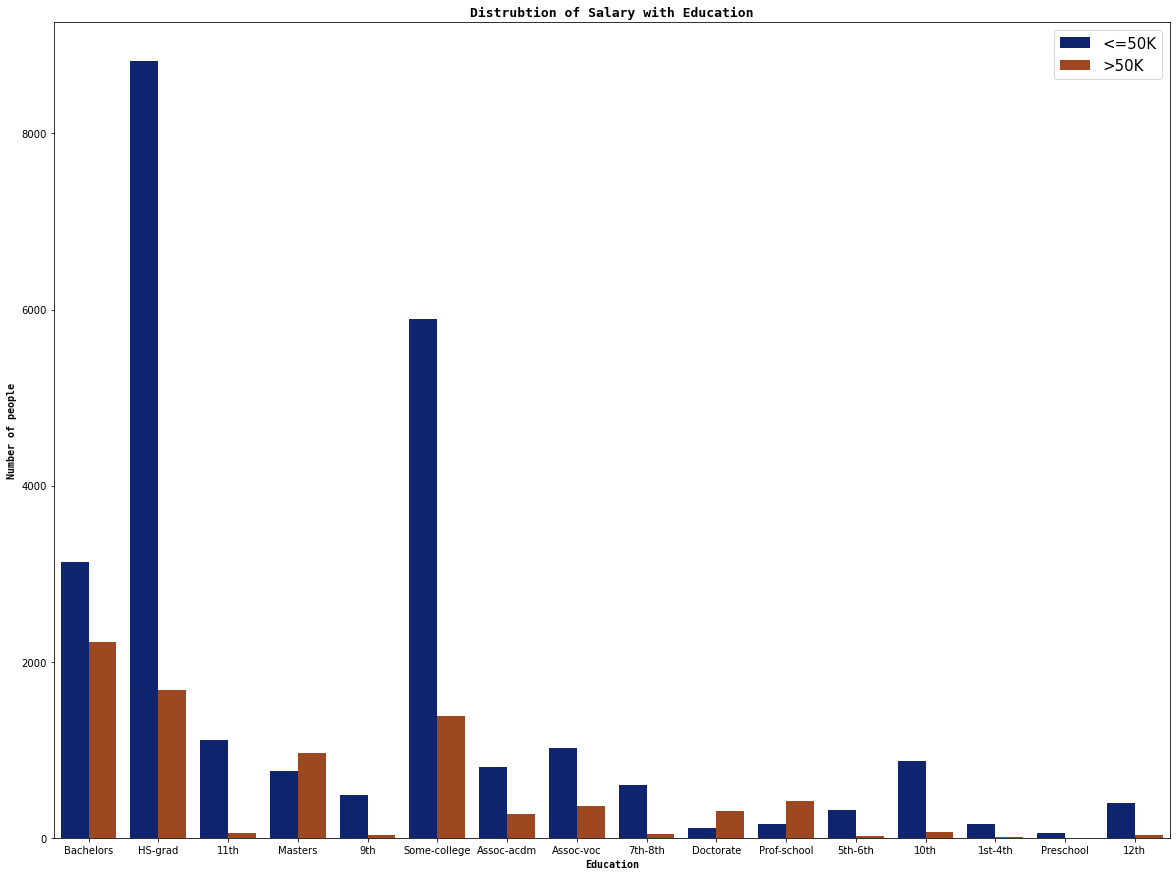

In [30]:
# countplot of salary by education

plt.figure(figsize=(20,15))
sns.countplot(df['education'], 
              hue=df['salary'], palette='dark')
plt.title('Distrubtion of Salary with Education', fontdict={
    'fontname':'Monospace', 'fontsize':13, 'fontweight':'bold'})
plt.xlabel('Education', fontdict={
    'fontname':'Monospace', 'fontsize':10, 'fontweight':'bold'})
plt.ylabel('Number of people',fontdict={
    'fontname':'Monospace', 'fontsize':10, 'fontweight':'bold'})
plt.legend(loc=1, prop={'size':15})
plt.tick_params(labelsize=10)
plt.show()

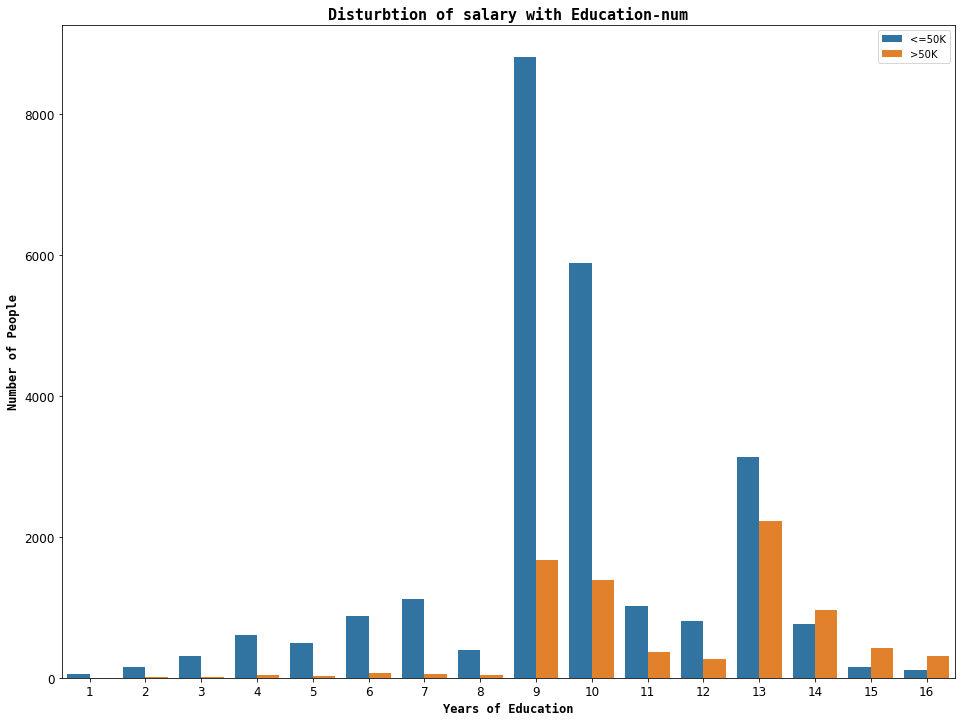

In [31]:
# Countplot of salary with years of Education-num

plt.figure(figsize=(16,12))
sns.countplot(df['education-num'], hue=df['salary'])
plt.title('Disturbtion of salary with Education-num', fontdict={
    'fontname':'Monospace', 'fontsize':15, 'fontweight':'bold'})
plt.xlabel('Years of Education', fontdict={
    'fontname':'Monospace', 'fontsize':12, 'fontweight':'bold'})
plt.ylabel('Number of People', fontdict={
    'fontname':'Monospace', 'fontsize':12, 'fontweight':'bold'})
plt.legend(loc=1, prop={'size':10})
plt.tick_params(labelsize=12)
plt.show()

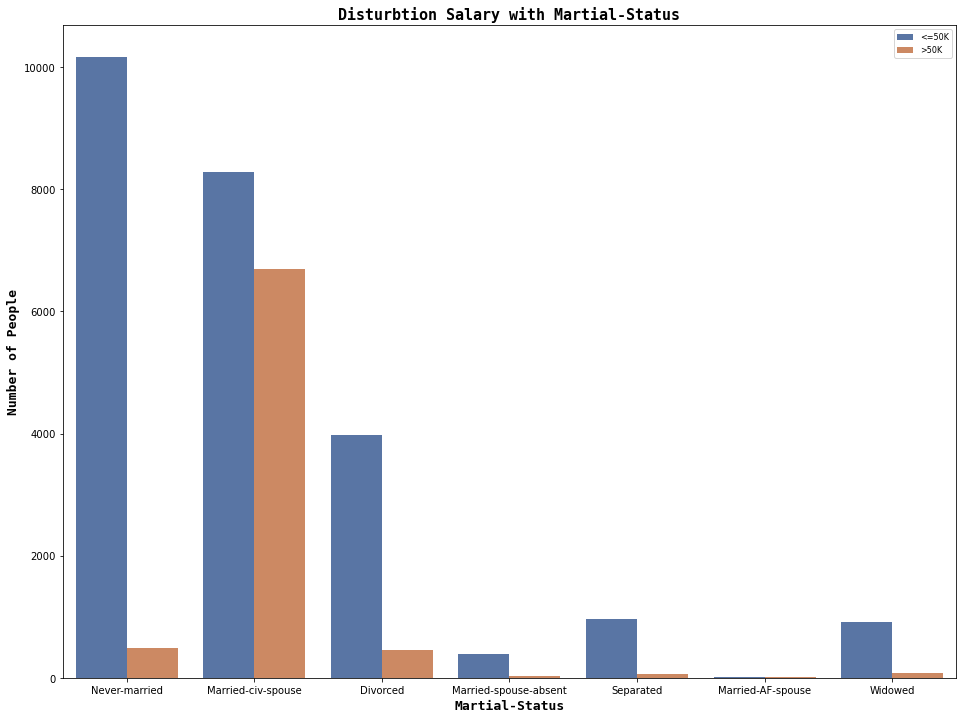

In [32]:
# creating of salary with Marital status

plt.figure(figsize=(16,12))
sns.countplot(df['marital-status'], 
              hue=df['salary'], palette='deep')
plt.title('Disturbtion Salary with Martial-Status', fontdict={
    'fontname':'Monospace', 'fontsize':15, 'fontweight':'bold'})
plt.xlabel('Martial-Status', fontdict={
    'fontname':'Monospace', 'fontsize':13, 'fontweight':'bold'})
plt.ylabel('Number of People', fontdict={
    'fontname':'Monospace', 'fontsize':13, 'fontweight':'bold'})
plt.legend(loc=1, prop={'size':8})
plt.tick_params(labelsize=10)
plt.show()

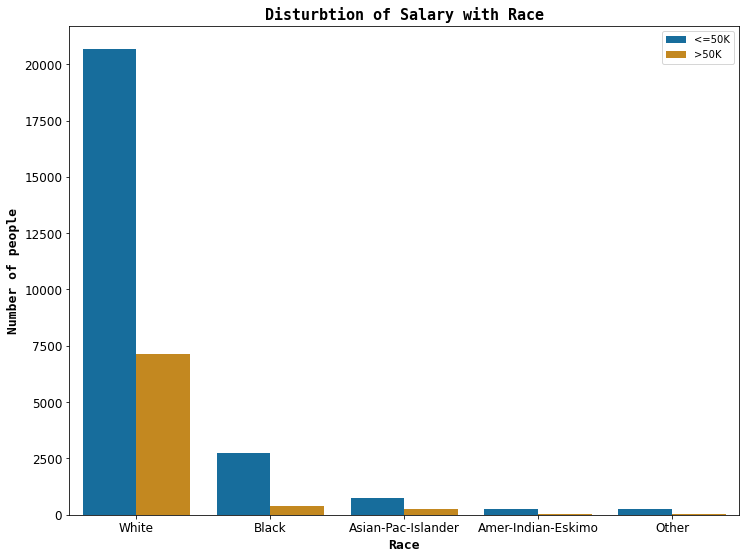

In [33]:
# creating countplot of salary with race

plt.figure(figsize=(12,9))
sns.countplot(df['race'], 
              hue=df['salary'], palette='colorblind')
plt.title('Disturbtion of Salary with Race', fontdict={
    'fontname':'Monospace', 'fontsize':15, 'fontweight':'bold'})
plt.xlabel('Race', fontdict={
    'fontname':'Monospace', 'fontsize':13, 'fontweight':'bold'})
plt.ylabel('Number of people', fontdict={
    'fontname':'Monospace', 'fontsize':13, 'fontweight':'bold'})
plt.legend(loc=1, prop={'size':10})
plt.tick_params(labelsize=12)
plt.show()

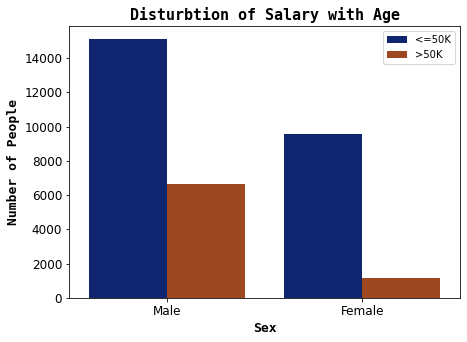

In [34]:
# creating countplot of salary with sex

plt.figure(figsize=(7,5))
sns.countplot(df['sex'],
              hue=df['salary'], palette='dark')
plt.title('Disturbtion of Salary with Age', fontdict={
    'fontname':'Monospace', 'fontsize':15, 'fontweight':'bold'})
plt.xlabel('Sex', fontdict={
    'fontname':'Monospace', 'fontsize':13, 'fontweight':'bold'})
plt.ylabel('Number of People', fontdict={
    'fontname':'Monospace', 'fontsize':13, 'fontweight':'bold'})
plt.legend(loc=1, prop={'size':10})
plt.tick_params(labelsize=12)
plt.show()

# Multiple Plot with help of Pairplot

In [35]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['salary'] = le.fit_transform(df['salary'])

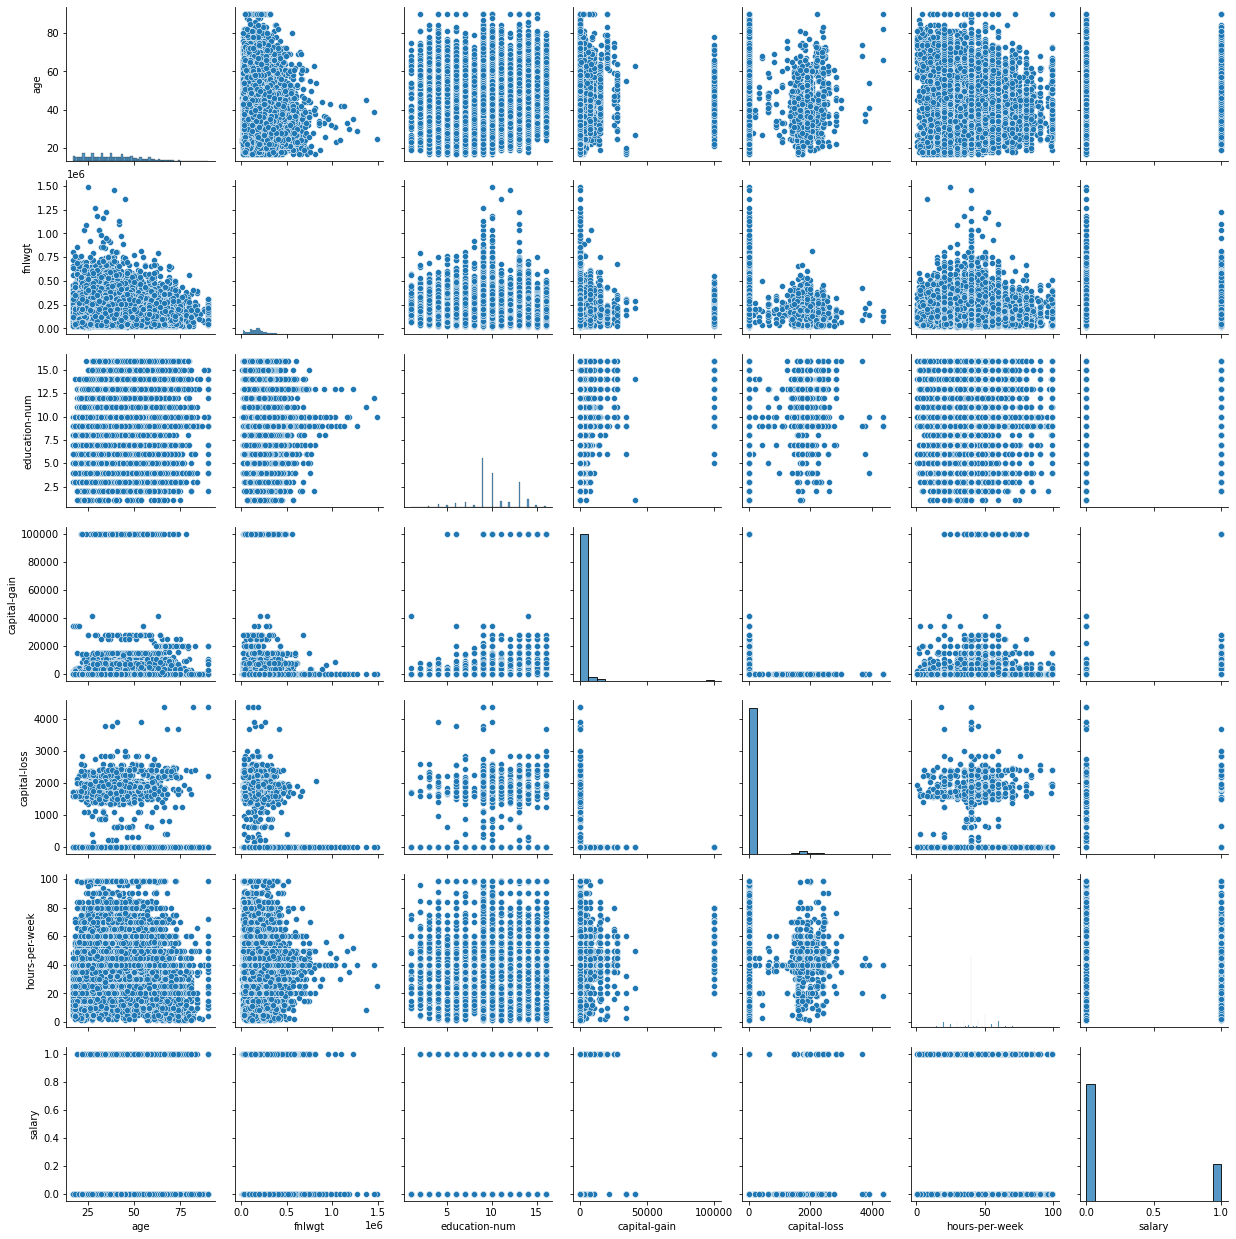

In [36]:
# pairplot of df (adult dataset)
sns.pairplot(df)
plt.show()

# Correlation

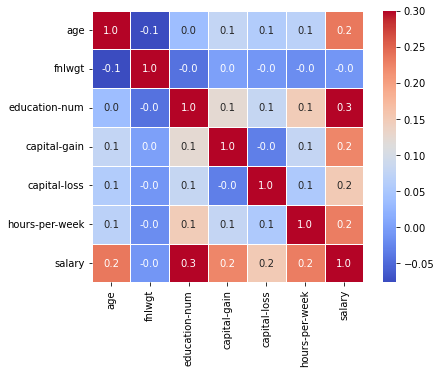

In [37]:
# Correlation matrix 
  
corr = df.corr()
f,ax = plt.subplots(figsize=(7,5))
sns.heatmap(corr, cbar = True, square = True, annot = True, fmt= '.1f', 
            xticklabels= True, yticklabels= True, vmax=0.3,
            cmap="coolwarm", linewidths=.5, ax=ax)
plt.show()

# LabelEncoder

In [38]:
for col in df.columns:
    if df[col].dtypes == 'object':
        encoder = LabelEncoder()
        df[col] = encoder.fit_transform(df[col])

In [39]:
X = df.drop('salary',axis=1)
Y = df['salary']

# Modelling

In [40]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=42)

In [41]:
ros.fit(X, Y)

RandomOverSampler(random_state=42)

In [42]:
X_resampled, Y_resampled = ros.fit_resample(X, Y)

In [43]:
round(Y_resampled.value_counts(normalize=True) * 100, 2).astype('str') + ' %'

0    50.0 %
1    50.0 %
Name: salary, dtype: object

In [44]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(
X_resampled, Y_resampled, test_size=0.2, random_state=42)

In [45]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("Y_train shape:", Y_train.shape)
print("Y_test shape:", Y_test.shape) 

X_train shape: (39516, 14)
X_test shape: (9880, 14)
Y_train shape: (39516,)
Y_test shape: (9880,)


# Logistic Regression

In [46]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(random_state=42)

In [47]:
log_reg.fit(X_train, Y_train)

LogisticRegression(random_state=42)

In [48]:
Y_pred_log_reg = log_reg.predict(X_test)

In [49]:
print("Logistic Regression:")
print('Accuracy Score: ', 
      round(accuracy_score(Y_test, Y_pred_log_reg)* 100, 2))
print('F1 Score: ', 
      round(f1_score(Y_test, Y_pred_log_reg) * 100, 2))

Logistic Regression:
Accuracy Score:  65.37
F1 Score:  63.23


# KNN Classifier 

In [50]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

In [51]:
knn.fit(X_train, Y_train)

KNeighborsClassifier()

In [52]:
Y_pred_knn = knn.predict(X_test)

In [53]:
print('KNN Classifier: ')
print('Accuracy Score: ',
      round(accuracy_score(Y_test, Y_pred_knn) * 100, 2))
print('F1 Score: ',
      round(f1_score(Y_test, Y_pred_knn) * 100, 2))

KNN Classifier: 
Accuracy Score:  72.75
F1 Score:  74.82


# Support Vector Classifier (SVC)

In [54]:
from sklearn.svm import SVC
svc = SVC(random_state=42)

In [55]:
svc.fit(X_train, Y_train)

SVC(random_state=42)

In [56]:
Y_pred_svc = svc.predict(X_test)

In [57]:
print('Support Vector Classifier: ')
print('Accuracy Score: ', 
      round(accuracy_score(Y_test, Y_pred_svc) * 100 , 2))
print('F1 Score: ',
      round(f1_score(Y_test, Y_pred_svc) * 100 , 2))

Support Vector Classifier: 
Accuracy Score:  59.23
F1 Score:  32.01


# Naive Bayes Classifier

In [58]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()

In [59]:
nb.fit(X_train, Y_train)

GaussianNB()

In [60]:
Y_pred_nb = nb.predict(X_test)

In [61]:
print('Support Vector Classifier: ')
print('Accuracy Score: ',
      round(accuracy_score(Y_test, Y_pred_nb) * 100, 2))
print('F1 Score: ', 
      round(f1_score(Y_test, Y_pred_nb) * 100 , 2))

Support Vector Classifier: 
Accuracy Score:  62.59
F1 Score:  44.98


# Decision Tree Classifier 

In [62]:
from sklearn.tree import DecisionTreeClassifier
dec_tree = DecisionTreeClassifier(random_state=42)

In [63]:
dec_tree.fit(X_train, Y_train)

DecisionTreeClassifier(random_state=42)

In [64]:
Y_pred_dec_tree = dec_tree.predict(X_test)

In [65]:
print('Support Vector Classifier: ')
print('Accuracy Score: ',
      round(accuracy_score(Y_test, Y_pred_dec_tree)* 100, 2))
print('F1 Score: ', 
      round(f1_score(Y_test, Y_pred_dec_tree) * 100, 2))

Support Vector Classifier: 
Accuracy Score:  91.13
F1 Score:  91.57


# Random Forest Classifier

In [66]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=42)

In [67]:
rf.fit(X_train, Y_train)

RandomForestClassifier(random_state=42)

In [68]:
Y_pred_rf = rf.predict(X_test)

In [69]:
print('Support Vector Classifier: ')
print('Accuracy Score: ',
      round(accuracy_score(Y_test, Y_pred_rf) * 100 , 2))
print('F1 Score: ', 
      round(f1_score(Y_test, Y_pred_rf)* 100 , 2))

Support Vector Classifier: 
Accuracy Score:  92.98
F1 Score:  93.23


# XGB Classifier

In [70]:
from xgboost import XGBClassifier
xgb = XGBClassifier()

In [71]:
xgb.fit(X_train, Y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [72]:
Y_pred_xgb = xgb.predict(X_test)

In [73]:
print('Support Vector Classifier: ')
print('Accuracy Score: ',
      round(accuracy_score(Y_test, Y_pred_xgb) * 100 , 2))
print('F1 Score: ',
      round(f1_score(Y_test, Y_pred_xgb) * 100 , 2))

Support Vector Classifier: 
Accuracy Score:  86.95
F1 Score:  87.33


# AdaBoost Classifier

In [74]:
from sklearn.ensemble import AdaBoostClassifier
adaboost = AdaBoostClassifier(random_state=42)

In [75]:
adaboost.fit(X_train, Y_train)

AdaBoostClassifier(random_state=42)

In [76]:
Y_pred_adaboost = adaboost.predict(X_test)

In [77]:
print('Support Vector Classifier: ')
print('Accuracy Score: ', 
      round(accuracy_score(Y_test, Y_pred_adaboost) * 100, 2))
print('F1 Score: ', 
      round(f1_score(Y_test, Y_pred_adaboost) * 100, 2))

Support Vector Classifier: 
Accuracy Score:  82.18
F1 Score:  82.42


# Confusion Matrix

In [78]:
from sklearn.metrics import confusion_matrix
con_mat = confusion_matrix(Y_test, Y_pred_rf)

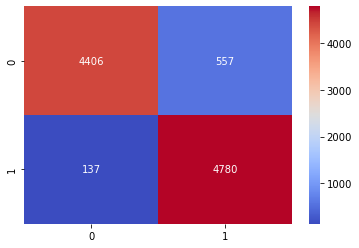

In [79]:
sns.heatmap(con_mat, annot=True, cmap='coolwarm', fmt='d')
plt.show()

# Classification Report

In [80]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, Y_pred_rf))

              precision    recall  f1-score   support

           0       0.97      0.89      0.93      4963
           1       0.90      0.97      0.93      4917

    accuracy                           0.93      9880
   macro avg       0.93      0.93      0.93      9880
weighted avg       0.93      0.93      0.93      9880

